In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px

from textblob import TextBlob

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/GP Orders - 2.csv
/kaggle/input/GP Orders - 4.csv
/kaggle/input/GP Orders - 5.csv


In [3]:
df = pd.read_csv("/kaggle/input/GP Orders - 5.csv",encoding="utf-8", delimiter=',')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
df.head(5)

There are 19239 rows and 8 columns


,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0


Rename column names for better EDA and Let's take a quick look at what the data looks like:

In [4]:
df = df.rename(columns={'Order Number': 'Order_Number',"Order Status":"Order_Status", "Book Name":"Book_Name","Order Date & Time":"Order_Date","City":"Billing_City", "Payment Method":"Payment_Method", "Total items":"Total_Items", "Total weight (grams)": "Total_Weight"})
df.head(5)

,Order_Number,Order_Status,Book_Name,Order_Date,Billing_City,Payment_Method,Total_Items,Total_Weight
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0


In [5]:
df.isnull().sum()

Order_Number       0
Order_Status       0
Book_Name          2
Order_Date         0
Billing_City       1
Payment_Method    10
Total_Items        0
Total_Weight       0
dtype: int64

In [6]:
df[df['Book_Name'].isna()]

,Order_Number,Order_Status,Book_Name,Order_Date,Billing_City,Payment_Method,Total_Items,Total_Weight
12350,60457,Returned,NaN,11/14/2020 0:00,Dera Ismail Khan,BankTransfer,0,200.0
16976,67823,Returned,NaN,1/2/2021 20:31,Karachi,EasyPaisa,0,200.0


In [7]:
df[df['Billing_City'].isna()]

,Order_Number,Order_Status,Book_Name,Order_Date,Billing_City,Payment_Method,Total_Items,Total_Weight
15266,65221,Completed,"Blockchain, Cryptocurrency And Bitcoin/R ka Ta...",12/17/2020 7:18,NaN,BankTransfer,6,500.0


In [8]:
df.dropna(inplace= True)

In [9]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 19226 rows and 8 columns


In [10]:
df.Order_Status.unique()

array(['Completed', 'Cancelled', 'Returned'], dtype=object)

In [11]:
df.Order_Status.value_counts()


Completed    17937
Returned      1140
Cancelled      149
Name: Order_Status, dtype: int64

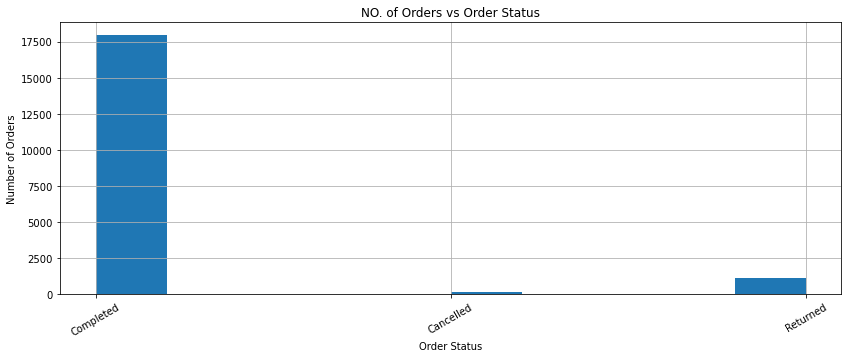

In [12]:
# Set the width and height of the figure
plt.figure(figsize=(14,5))
histogram= df.Order_Status.hist()

# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("NO. of Orders vs Order Status")
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.show()

Distribution graphs (histogram/bar graph) of sampled columns:

In [13]:
df.Billing_City.nunique()

4163

In [14]:
df.Billing_City.value_counts()

Karachi                           2330
Lahore                            1992
Islamabad                          858
Rawalpindi                         645
Faisalabad                         478
                                  ... 
جھنگ سٹی                             1
Lahoi                                1
PAC Kamra, Attock.                   1
Peshawar swat                        1
Same as above (Street address)       1
Name: Billing_City, Length: 4163, dtype: int64

In [15]:
cities = df.Billing_City.unique()
cities

array(['Rawalpindi', 'Hyderabad', 'Karachi ', ...,
       'tehsil Bhalwal District Sargodha', 'Clifton / Karachi',
       'Mailsi, district Vehari'], dtype=object)

In [16]:
#Convert Billing_City into lower case letters
df['Billing_City'] = df['Billing_City'].str.lower()
df['Billing_City'] = df['Billing_City'].str.strip()

In [17]:
#Convert Book_Name into lower case letters
df['Book_Name'] = df['Book_Name'].str.lower()
df['Book_Name'] = df['Book_Name'].str.strip()
df

,Order_Number,Order_Status,Book_Name,Order_Date,Billing_City,Payment_Method,Total_Items,Total_Weight
1,308,Completed,kaggle for begginers,10/3/2019 15:54,rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,kaggle for begginers/bitcoin blockchain aur cr...,10/3/2019 16:09,hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,kaggle for begginers,10/3/2019 16:42,rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,bit coin block chain aur crypto currency بٹ کو...,10/3/2019 16:44,karachi,Cash on Delivery (COD),1,200.0
5,312,Completed,bit coin block chain aur crypto currency بٹ کو...,10/3/2019 18:17,fsd,Cash on Delivery (COD),5,200.0
...,...,...,...,...,...,...,...,...
19234,71332,Completed,linux - an introduction,1/25/2021 12:46,lahore,Cash on delivery,1,200.0
19235,71394,Completed,r ka taaruf/ڈیٹا سائنس/python programming/kagg...,1/25/2021 14:06,lahore,Cash on delivery,4,200.0
19236,71418,Completed,"blockchain, cryptocurrency and bitcoin/column ...",1/25/2021 16:37,larkana,Cash on delivery,2,500.0
19237,71419,Completed,مشین لرننگ/ڈیٹا سائنس/artificial intelligence/...,1/25/2021 18:01,"mailsi, district vehari",Cash on delivery,10,400.0


In [18]:
df['Payment_Method'] = df['Payment_Method'].replace({"Cash on Delivery (COD)": "Cash on delivery"})
df.Payment_Method.value_counts().to_frame('counts')

,counts
Cash on delivery,17477
EasyPaisa,696
JazzCash,596
BankTransfer,457


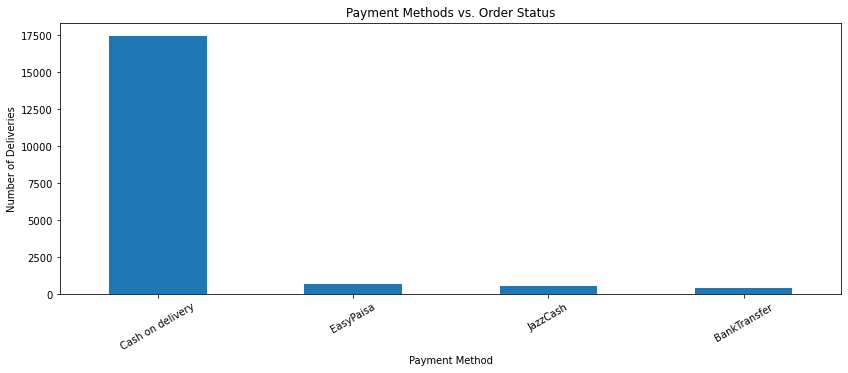

In [19]:
# Set the width and height of the figure
plt.figure(figsize=(14,5))

df.Payment_Method.value_counts().plot(kind='bar')
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Payment Methods vs. Order Status")
plt.xlabel("Payment Method")
plt.ylabel("Number of Deliveries")

plt.show()

In [20]:
#Shout out muhammadismail99 for this function

from itertools import chain
# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split('/')))

# calculate lengths of splits
lens = df['Book_Name'].str.split('/').map(len)

# create new dataframe, repeating or chaining as appropriate
df = pd.DataFrame({'Order_Number': np.repeat(df['Order_Number'], lens),
                    'Order_Status': np.repeat(df['Order_Status'], lens),
                    'Book_Name': chainer(df['Book_Name']),
                    'Order_Date': np.repeat(df['Order_Date'], lens),
                    'Billing_City': np.repeat(df['Billing_City'], lens)})

In [21]:
df = df.assign(Order_Books_Name=df.Book_Name.str.split("/")).explode("Book_Name")

AttributeError: 'DataFrame' object has no attribute 'Payment_Method'

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1746 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0, flags=flags)


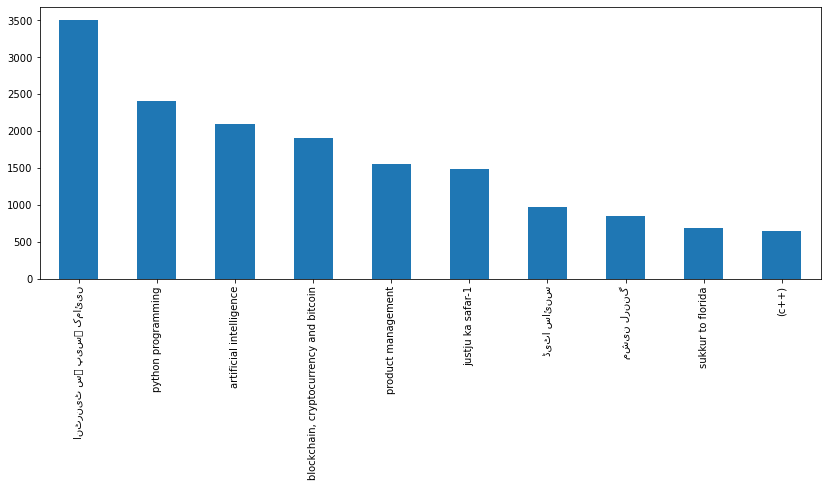

In [22]:
# Set the width and height of the figure
plt.figure(figsize=(14,5))

top_10_seller = df.Order_Books_Name.explode().value_counts()[:10].plot.bar()

df.Payment_Method.value_counts().plot(kind='bar')

# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Top 10 Best Selling Books")
plt.xlabel("Books")
plt.ylabel("Number of Orders")
plt.show()

Best Selling Book

In [23]:
top_selling_books = df[df['Order_Status']=='Completed']['Book_Name'].value_counts()
top_selling_books.head(1)

انٹرنیٹ سے پیسہ کمائیں    3020
Name: Book_Name, dtype: int64

In [24]:

top10 = df["Book_Name"].value_counts().nlargest(10).to_frame()

graph = px.bar(top10, y =top10['Book_Name'], x = top10.index, title = 'Top 10 Books ')

graph.update_xaxes(title="Books")
graph.update_yaxes(title="Count")
graph.update_traces()
graph.show()

In [25]:
df["Order_Date"] = pd.DatetimeIndex(df["Order_Date"])
df['date'] = df['Order_Date'].dt.date
df['time'] = df['Order_Date'].dt.time
df["Day_Name"] = df["Order_Date"].dt.day_name()
df["Week_Day"] = df["Order_Date"].dt.dayofweek
df["DayofYear"] = df["Order_Date"].dt.dayofyear
df["Month_Number"] = df["Order_Date"].dt.month
df["Month_Name"] = df["Order_Date"].dt.month_name()
df['year'] = df["Order_Date"].dt.year
df.sample(50)

,Order_Number,Order_Status,Book_Name,Order_Date,Billing_City,Order_Books_Name,date,time,Day_Name,Week_Day,DayofYear,Month_Number,Month_Name,year
13090,61667,Completed,انٹرنیٹ سے پیسہ کمائیں؟- مستحقین زکواة,2020-11-21 20:39:00,multan,[انٹرنیٹ سے پیسہ کمائیں؟- مستحقین زکواة],2020-11-21,20:39:00,Saturday,5,326,11,November,2020
8083,54179,Completed,sukkur to florida,2020-09-05 10:07:00,tehsil sillanwali,[sukkur to florida],2020-09-05,10:07:00,Saturday,5,249,9,September,2020
7849,53875,Completed,python programming,2020-09-01 11:14:00,gilgit,[python programming],2020-09-01,11:14:00,Tuesday,1,245,9,September,2020
2968,35776,Completed,artificial intelligence,2020-05-31 23:52:00,karachi,[artificial intelligence],2020-05-31,23:52:00,Sunday,6,152,5,May,2020
18182,69538,Completed,lucky draw - free book,2021-01-09 17:33:00,پتوکی,[lucky draw - free book],2021-01-09,17:33:00,Saturday,5,9,1,January,2021
14968,64670,Completed,مشین لرننگ,2020-12-13 08:59:00,city kabirwala,[مشین لرننگ],2020-12-13,08:59:00,Sunday,6,348,12,December,2020
3557,41302,Completed,hikmat ki batain,2020-06-14 01:35:00,jubail,[hikmat ki batain],2020-06-14,01:35:00,Sunday,6,166,6,June,2020
1699,29103,Completed,justju ka safar-1,2020-05-05 04:04:00,mardan,[justju ka safar-1],2020-05-05,04:04:00,Tuesday,1,126,5,May,2020
8866,55389,Completed,r ka taaruf,2020-09-20 03:55:00,north york,[r ka taaruf],2020-09-20,03:55:00,Sunday,6,264,9,September,2020
8016,54100,Completed,multi target,2020-09-04 21:03:00,islamabad,[multi target],2020-09-04,21:03:00,Friday,4,248,9,September,2020
